In [2]:
import numpy as np
import sys
sys.path.append("../../src/")
import utility
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from scipy.stats import kruskal
from statsmodels.stats.proportion import proportions_chisquare

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import statsmodels.api as sm

from scipy import stats

import pandas as pd

import math
import seaborn as sns

In [4]:
df_IEA_train = pd.read_csv("../../output/IEA_train.csv").set_index("sid")
df_IEA_test = pd.read_csv("../../output/IEA_test.csv").set_index("sid")

df_IEA = pd.concat([df_IEA_train, df_IEA_test])

df_data = utility.load_data()

df_used = pd.merge(df_data, df_IEA, left_index = True, right_index = True)[ ["IEA0", "IEA1", "KM_v2"]]

/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

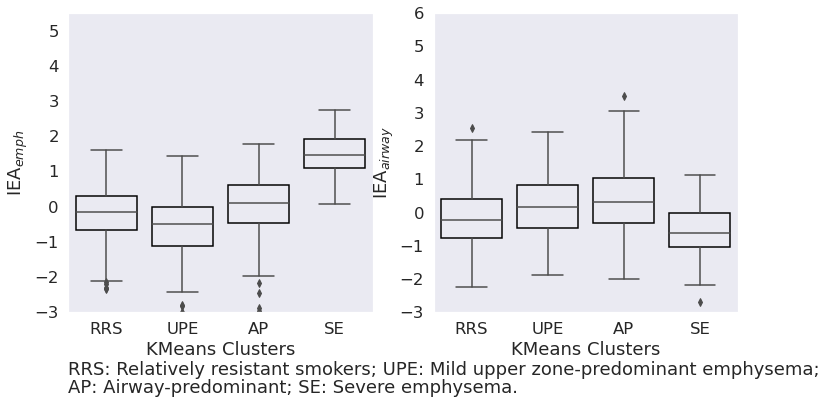

In [5]:
cluster_labels = ["RRS", "UPE", "AP", "SE"]

df_used = df_used.rename(columns = {"IEA0":"IEA$_{emph}$", "IEA1":"IEA$_{airway}$", "KM_v2":"KMeans Clusters"})

sns.set(font_scale = 1.5)

plt.figure(figsize = [12, 5.5])
ax1 = plt.subplot(121)
ax1 = sns.boxplot(x="KMeans Clusters", y="IEA$_{emph}$", data=df_used)
ax1.set_xticklabels(["RRS", "UPE", "AP", "SE"])
ax1.set_ylim(-3, 5.5)

ax1.grid(False)

for patch in ax1.artists:
    patch.set_facecolor((0, 0, 0, 0))
    patch.set_edgecolor((0, 0, 0, 1))

_ = plt.text(-.5, -4.8, "RRS: Relatively resistant smokers; UPE: Mild upper zone-predominant emphysema;", 
          fontsize = 18)
_ = plt.text(-.5, -5.3, "AP: Airway-predominant; SE: Severe emphysema.",
          fontsize = 18)


ax2 = plt.subplot(122)
ax2 = sns.boxplot(x="KMeans Clusters", y="IEA$_{airway}$", data=df_used)
ax2.set_xticklabels(cluster_labels)
ax2.set_ylim(-3, 6.)

ax2.grid(False)

for patch in ax2.artists:
    patch.set_facecolor((0, 0, 0, 0))
    patch.set_edgecolor((0, 0, 0, 1))


# p-values with IEA$_{emph}$

In [19]:
for iii in range(1, 5):
    for jjj in range(1, iii ):
        
        p_values = kruskal( 
                df_used.loc[df_used["KMeans Clusters"] == iii, "IEA$_{emph}$"], 
                 df_used.loc[df_used["KMeans Clusters"] == jjj, "IEA$_{emph}$"]
               ).pvalue
        
        print( "{} vs {} p-value:{:.2e}".format(cluster_labels[iii - 1], cluster_labels[jjj - 1], p_values)
        )
        


UPE vs RRS p-value:1.04e-05
AP vs RRS p-value:9.73e-06
AP vs UPE p-value:5.50e-12
SE vs RRS p-value:1.14e-61
SE vs UPE p-value:5.93e-46
SE vs AP p-value:8.31e-47


# p-values with IEA$_{airway}$

In [20]:
for iii in range(1, 5):
    for jjj in range(1, iii ):
        
        p_values = kruskal( 
                df_used.loc[df_used["KMeans Clusters"] == iii, "IEA$_{airway}$"], 
                 df_used.loc[df_used["KMeans Clusters"] == jjj, "IEA$_{airway}$"]
               ).pvalue
        
        print( "{} vs {} p-value:{:.2e}".format(cluster_labels[iii - 1], cluster_labels[jjj - 1], p_values)
        )
        


UPE vs RRS p-value:1.03e-04
AP vs RRS p-value:2.88e-13
AP vs UPE p-value:3.15e-02
SE vs RRS p-value:1.86e-05
SE vs UPE p-value:2.75e-10
SE vs AP p-value:3.65e-18
